In [1]:
#default_exp debug

# DEBUG
> Detail API

In [9]:
#export
import os
import os.path as osp
import matplotlib.pyplot as plt
import numpy as np
import mmcv
from fastcore.script import *
import shutil


@call_parse
def make_mini_coco(json_path: Param(),
                   image_prefix: Param(),
                   out_dir: Param(),
                   num_samples: Param("Num of sample",type=int) = 1000):
    """
        Helper function for creating a mini-dataset ensembles it's father
    """
    from pycocotools.coco import COCO
    new_img_prefix = osp.join(out_dir, "images")

    out_json = os.path.join(out_dir, "annotations", "mini_json.json")
    if not osp.exists(out_json):
        print("Making mini dataset", out_dir, "num images:", num_samples)
        os.makedirs(os.path.join(out_dir, "images"), exist_ok=True)
        os.makedirs(os.path.join(out_dir, "annotations"), exist_ok=True)
        coco = COCO(json_path)
        # imgs = coco.imgs
        img_ids = list(coco.imgs.keys())
        np.random.seed(0)
        selected_img_ids = np.random.choice(img_ids, num_samples, replace=False)
        imgs = coco.loadImgs(selected_img_ids)
        selected_ann_ids = coco.getAnnIds(selected_img_ids)
        anns = coco.loadAnns(selected_ann_ids)
        for i, ann in enumerate(anns):
            ann['iscrowd'] = False
            anns[i] = ann
        out_dict = dict(
            images=imgs,
            annotations=anns,
            categories=coco.dataset['categories'],

        )
        for img in imgs:
            path = osp.join(image_prefix, img['file_name'])
            new_path = osp.join(new_img_prefix, img['file_name'])
            shutil.copy(path, new_path)

        mmcv.dump(out_dict, out_json)
    print(out_json, new_img_prefix)
    return out_json, new_img_prefix


In [17]:
import mmcv

In [19]:
#export
@call_parse
def dpython(cmd: Param(type=str)):
    for _ in range(3):
        cmd = cmd.replace('  ', '')
    i_split = cmd.index(".py")+4
    file = cmd[:i_split].strip().split(' ')[1]

    args = cmd[i_split:].split(' ')
    cfg_name = os.environ.get("DNAME", "Latest-Generated")
    cfg = {
        "name": f"Python: {cfg_name}",
        "type": "python",
        "request": "launch",
        "program": f"{file}",
        "console": "integratedTerminal",
        "args": args,
    }
    # pp(cfg)
    mmcv.mkdir_or_exist(".vscode")
    try:
        lauch = read_json(".vscode/launch.json")
    except:
        lauch = {
            "version": "0.2.0",
            "configurations": [

            ]
        }
    replace = False
    for i, _cfg in enumerate(lauch['configurations']):
        if _cfg["name"] == cfg["name"]:
            lauch["configurations"][i] = cfg
            replace = True
    if not replace:
        lauch["configurations"] += [cfg]
#     with open(, 'w') as f:
#         mmcv.dump(lauch, f, indent=4)
        mmcv.dump(lauch, '.vscode/launch.json')
    


In [39]:
# export 

import mmcv
import numpy as np
class VisualizeCoco:
    def __init__(self, gt, img_dir, pred=None):
        if isinstance(gt, str):
            from pycocotools.coco import COCO
            gt = COCO(gt)
        if isinstance(pred, str):
            pred = gt.loadRes(mmcv.load(pred))
            
        self.gt = gt
        self.pred = pred
        self.img_dir = img_dir
        self.img_ids = [_['id'] for _ in gt.imgs.values()]

    def visualize(self, img_id, verbose=True, zoom=False, mode='pred'):        
        assert self.pred is not None
        gt = self.gt
        pred = self.pred
        CLASSES = [_['name'] for _ in self.gt.dataset['categories']]
        im = gt.imgs[img_id]
        source = pred if mode == 'pred' else gt
        anns = source.loadAnns(source.getAnnIds(im['id']))
        ann_ids = source.getAnnIds(im['id'])
        if verbose:
            print('Num of bboxes:', len(ann_ids))
        bb_preds  = source.loadAnns(ann_ids)

        det_bboxes = []
        lables = []
        for bb_pred in bb_preds:
            x1,y1,w,h = bb_pred['bbox']
            x2 = x1+w
            y2 = y1+h
            det_bboxes.append([x1,y1,x2,y2, bb_pred.get('score', 1)])
            lables.append(bb_pred['category_id'])

        det_bboxes = np.array(det_bboxes)
        lables = np.array(lables)
        img = mmcv.imread(self.img_dir+im['file_name'], channel_order='rgb')
        img = mmcv.visualization.imshow_det_bboxes(img, det_bboxes, lables, CLASSES, show=False)
        return img
    
    def 

In [40]:
cd ~/gitprojects/yolox/

/home/av/gitprojects/yolox


In [41]:
vis_coco = VisualizeCoco('./datasets/tsd/vinai_bdi_combined/annotations/test.json', './datasets/tsd/vinai_bdi_combined/test-images/', './YOLOX_outputs/yolox_m_tsd_onnx/best_ckpt.pth_eval_out.pkl')

loading annotations into memory...
Done (t=0.17s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.08s)
creating index...
index created!


Num of bboxes: 1


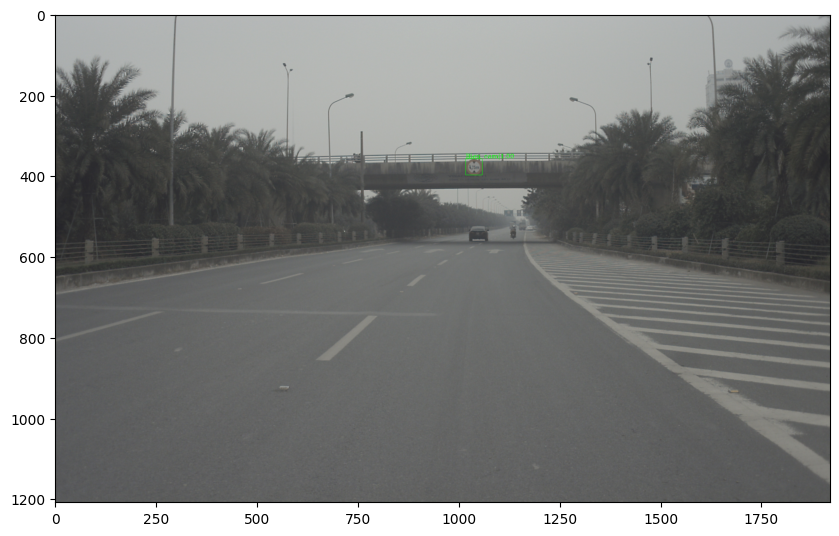

In [42]:
from avcv.visualize import *
show(vis_coco.visualize(vis_coco.img_ids[0], mode='gt'), dpi=100)